#  Dr Adeayo Sotayo Face Recognition & Detector 

In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import cv2
import face_recognition
import matplotlib.pyplot as plt
import os
%matplotlib inline

# A helper function to view images

In [2]:
def plot_images(images,number_of_images=4, labels=None):

    fig, axes = plt.subplots(nrows=1, ncols=number_of_images, figsize=(30,20))
    for y in range(number_of_images):
        axes[y].imshow(images[y])
        if labels is not None:
            axes[y].set_title(labels[y], fontsize=25)         
    plt.show()

### Convert jpg files into numpy arrays

In [3]:
Training_image = face_recognition.load_image_file("mypics\Adeayo-Sotayo-2.jpg")

Ade = face_recognition.load_image_file("mypics\Adeayo-Sotayo-3.jpg")

Temi = face_recognition.load_image_file("mypics\Temi_4.jpg")

Abbas = face_recognition.load_image_file("mypics\Abbas_Egbeyemi.jpg")


#database_image = face_recognition.load_image_file("mypics\Adeayo-Sotayo-2.jpg")

#query_image1 = face_recognition.load_image_file("mypics\Adeayo-Sotayo-1.jpg")

#query_image2 = face_recognition.load_image_file("mypics\Temi.jpg")

#query_image3 = face_recognition.load_image_file("mypics\Abbas_Egbeyemi.jpg")

# Visualise Training and Test Images

Text(0.5, 1.0, 'Stranger_2(Abbas)')

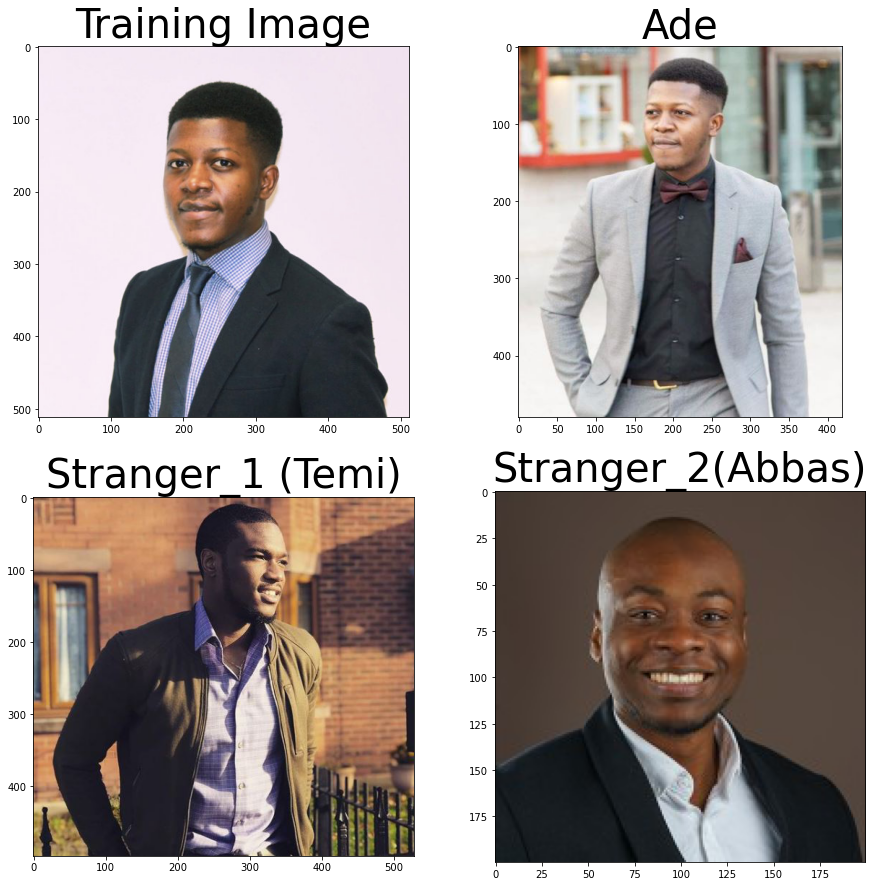

In [4]:
f, axarr = plt.subplots(2,2, figsize=(15, 15))
axarr[0,0].imshow(Training_image)
axarr[0,0].set_title('Training Image', fontsize=40)
axarr[0,1].imshow(Ade)
axarr[0,1].set_title('Ade', fontsize=40)
axarr[1,0].imshow(Temi)
axarr[1,0].set_title('Stranger_1 (Temi)', fontsize=40)
axarr[1,1].imshow(Abbas)
axarr[1,1].set_title('Stranger_2(Abbas)', fontsize=40)

### find face encodings in training image/database images

In [5]:
database_face_location = face_recognition.face_locations(Training_image)
database_face_encodings= face_recognition.face_encodings(Training_image, database_face_location)[0]
known_face_encodings = [database_face_encodings]
known_face_names = ["\n Ade"]


### helper function that performs face identification and draws bounding boxes of identified faces

In [6]:
def face_identifier(img):
    face_locations = face_recognition.face_locations(img)
    face_encodings = face_recognition.face_encodings(img, face_locations)
    #convert image to PIL-format image so we can draw on it
    pil_image = Image.fromarray(img)
    draw = ImageDraw.Draw(pil_image)    
    font = ImageFont.truetype(os.path.join(os.getcwd(), "arial.ttf"), 30)
    
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        
        #returns True or False value on if the encodings is a match.
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name  = "\n \n Unknown \n face"
        if matches[0]:
            name = known_face_names[0]
            print(name)
        # Draw a box around the face using the Pillow module
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 0), width = 3)

        # Draw a label with a name below the face
        text_width, text_height = draw.textsize(name)
        draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 1), font=font)
      
    #remove drawing library from memory as per Pillow docs
    del draw
    return pil_image
 
    
    

In [7]:
query_img1 = face_identifier(Ade)
query_img2  = face_identifier(Temi)
query_img3  = face_identifier(Abbas)


 Ade


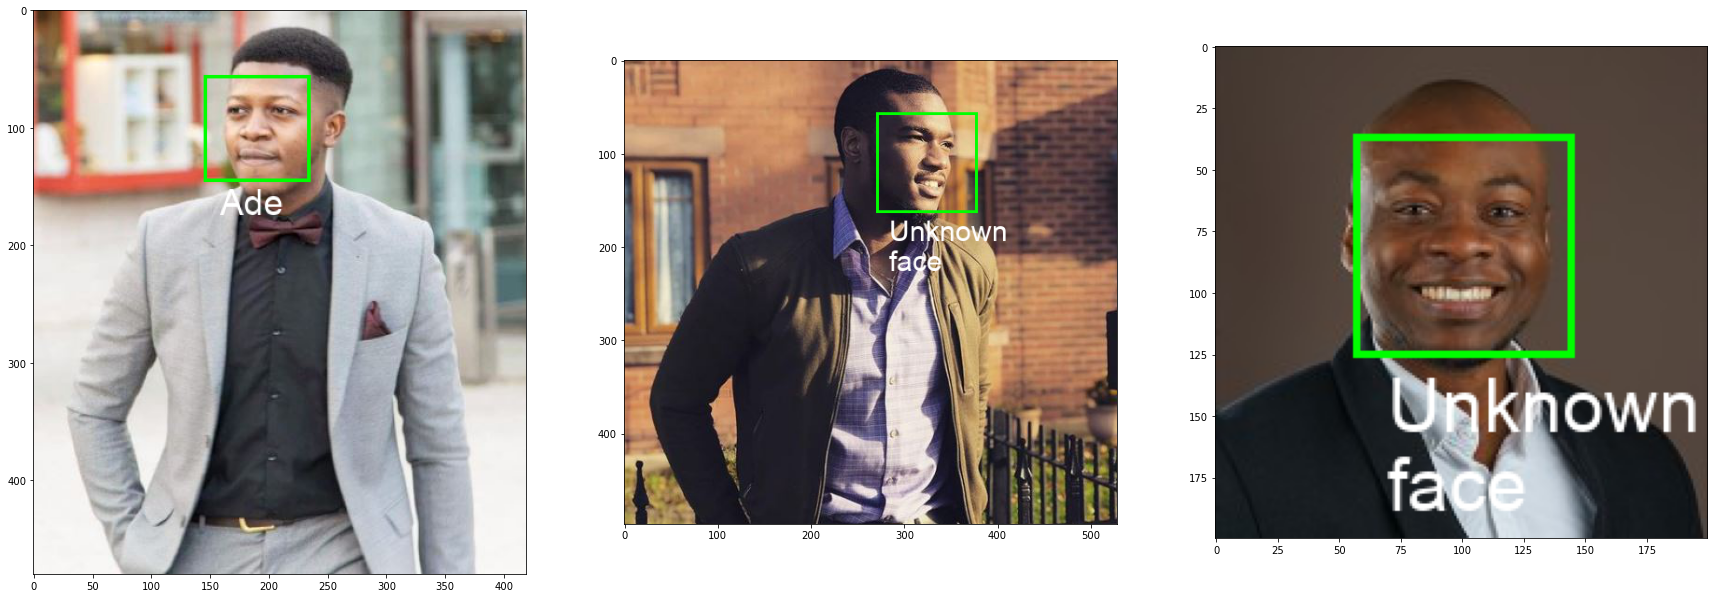

In [9]:
plot_images([query_img1, query_img2, query_img3 ], number_of_images=3)